In [1]:
from math import log10
import matplotlib.pyplot as plt
import numpy as np


In [2]:
qrel_file_path = "final_qrel"

In [3]:
score_file_path = "vertical_search_score"

In [4]:
def filetodict_qrels(file_path):
    qrel_file = {}
    with open(file_path) as file:
        text = file.read().split("\n")[:-1]
    for line in text:
        line = line.split()
        if line[0] not in qrel_file:
            qrel_file[line[0]] = {}
        _dict = {
            "AssessorID" : line[1],
            "DocID" : line[2],
            "Grade" : line[3]
        }
        qrel_file[line[0]][line[2]] = _dict
    return qrel_file
    

In [5]:
def filetodict_score(file_path):
    qrel_file = {}
    with open(file_path) as file:
        text = file.read().split("\n")[:-1]
    for line in text:
        line = line.split()
        if line[0] not in qrel_file:
            qrel_file[line[0]] = {}
        _dict = {
            "DocID" : line[2],
            "score" : line[4]
        }
        qrel_file[line[0]][line[2]] = _dict
    return qrel_file


In [6]:
# z = 0
# d_test = filetodict_qrels(qrel_file_path)
# for x in d_test["100"]:
#     z = z + int(d_test["100"][x]["Grade"])

In [7]:
# def treceval(qrel_file_path, score_file_path):
#     score_dict = filetodict_score(score_file_path)
#     qrel_dict = filetodict_qrels(qrel_file_path)

    
#     for query in score_dict:
#         print(query)        
#         print(len(score_dict[query]))
#         print(len(qrel_dict[query]))
#         query = "54"
# #         print(query)
#         query_qrel = qrel_dict[query]
#         newdict_keys = sorted(score_dict[query], key=lambda x: score_dict[query][x]['score'])[::-1]
       
        
# #         rel_doc = 0 
# #         for doc in query_qrel:
# #             if int(query_qrel[doc]['Grade']) == 1:
# #                 rel_doc = rel_doc + 1

# #         print(rel_doc)
# #         break
        
#         for i in range(1,len(newdict_keys)):
#             tp = 0
#             fp = 0 
#             tn = 0
#             fn = 0
#             for doc in newdict_keys[0:i]:
#                 if doc in query_qrel:
#                     if int(query_qrel[doc]['Grade']) == 1:
#                         tp = tp + 1
#                     else:
#                         fp = fp + 1
#                 else:
#                     fp = fp + 1

#             for doc in query_qrel:
#                 if doc in newdict_keys[0:i]:
#                     continue
#                 else:
#                     if int(query_qrel[doc]['Grade']) == 1:
#                         fn = fn + 1
#                     else:
#                         tn = tn + 1
# #             print(tp,fp,tn,fn)
                        
#             if(i in [5,10,15,20,30,100,200,500,1000]):
#                 print(i, (tp / (tp + fp)), (tp / (tp + fn)) )
# #             print(tp,fp,tn,fn)

#         break
                
        
        
# treceval(qrel_file_path, score_file_path)

In [15]:
def treceval(qrel_file_path, score_file_path, k, option, graph = False):
    score_dict = filetodict_score(score_file_path)
    qrel_dict = filetodict_qrels(qrel_file_path)

    total_query = 0
    
    arg_prec_all = [0 for i in range(1000)]
    avg_recal_all = [0 for i in range(1000)]
    avg_f1score_all = [0 for i in range(1000)]
    ndcg_all = 0
    dcg_all = 0
    r_precicion_avg = 0
    avg_precision_avg = 0

    
    
    for query in score_dict:
#         print(query)
        if(option == "-q"):
            print("Query no:", query)
        query_qrel = qrel_dict[query]
        newdict_keys = sorted(score_dict[query], key=lambda x: float(score_dict[query][x]['score']))[::-1]
        
        rel_doc = 0 
        for doc in query_qrel:

            rel = int(query_qrel[doc]['Grade'])
            if rel > 0:
                rel = 1
            rel_doc = rel_doc + rel
        
        num_ret = 0
        sum_prec = 0
        num_rel_ret = 0
        
        
        prec_list = []
        recal_list = []
        f1_list = []
        
        for doc in newdict_keys:

            num_ret = num_ret + 1
            rel = 0
            if doc in query_qrel:
                rel = int(query_qrel[doc]['Grade'])
            
            if rel > 0:
                rel = 1
                
            if(rel != 0):
                sum_prec = sum_prec + (rel * (1 + num_rel_ret) / num_ret)
                num_rel_ret = num_rel_ret + rel
                
                
            pre_score = num_rel_ret / num_ret
            rec_score = num_rel_ret / rel_doc
            try:
                f1_score = (2 * pre_score * rec_score) / ( pre_score + rec_score )
            except:
                f1_score = 0
                

                
            prec_list.append(round(pre_score,4))
            recal_list.append(round(rec_score,4))
            f1_list.append(f1_score)
        
        for i in range(len(prec_list), 1000):
            prec_list.append(round(pre_score,4))
            recal_list.append(round(rec_score,4))
            f1_list.append(f1_score)
            
        

            
        
        
        
        avg_prec = round(sum_prec / rel_doc,4)
        final_recal = round(num_rel_ret / rel_doc,4)
     

        avg_precision_avg = avg_precision_avg + avg_prec
        
#         avg_prec_k = 0
#         avg_recal_k = 0
#         avg_f1_k = 0

#         for i in [5, 10, 15, 20, 30, 100]:
#             avg_prec_k += prec_list[i-1]
#             avg_recal_k += recal_list[i-1]
#             avg_f1_k += f1_list[i-1]
            

        if(option == "-q"):
               
            print("number of docs:",len(prec_list))
            print("number of related docs:", rel_doc)
            print("number of related docs retrieved:", num_rel_ret)
            print("\n")


            if graph:
                plt.plot(recal_list,prec_list)
                plt.show()
            
            
            print("K\tPrecision\tRecall\tF1")
            for i in [5, 10, 15, 20, 30, 100]:
                str_print = str(i) + "\t"
                str_print = str_print + '{:.4f}'.format(round(prec_list[i-1], 4)) + "\t\t" 
                str_print = str_print + '{:.4f}'.format(round(recal_list[i-1], 4)) + "\t"
                str_print = str_print + '{:.4f}'.format(round(f1_list[i-1], 4)) + "\t"
                print(str_print)
            print("\n")
            
            i = 1
            
            print("Precision at cutoff recall")
            
#             print("Cuttoff\tRrecision")
#             for z in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
#                 while(i < 1000 and recal_list[i-1] < z):
#                     i = i + 1
#                 if i < 1000:
#                     print(z,"\t", '{:.4f}'.format(prec_list[i-1]))
#                 else:
#                     print(z, "\t",'{:.4f}'.format(0.0))
#         else:
#             print("Average Values for k@ [5, 10, 15, 20, 30, 100]")
#             print("Precision:", '{:.4f}'.format((avg_prec_k / 6)))
#             print("Recall:", '{:.4f}'.format((avg_recal_k / 6)))
#             print("F1 Scores:", '{:.4f}'.format((avg_f1_k / 6)))

        if(option == "-q"):

            print("\n")
            print("Average precision", round(avg_prec,4))

        num_rel_ret = num_rel_ret - 1
        
        if rel_doc > num_ret:
            r_prec = float(num_rel_ret) / rel_doc
        else:

            int_num_rel  = int(divmod(rel_doc,1)[0])
            frac_num_rel = rel_doc - int_num_rel
            
            r_prec = 0
            if frac_num_rel > 0:
                r_prec = ( 1 - frac_num_rel ) * prec_list[int_num_rel]
                r_prec = r_prec + (frac_num_rel * prec_list[int_num_rel + 1])
            else:
                r_prec = prec_list[int_num_rel]
            
        if(option == "-q"):
            print("R-precision", round(r_prec,4))
        
        r_precicion_avg = r_precicion_avg + r_prec
        
        relevant_req = []
        for doc in newdict_keys:
            if doc in query_qrel:
                relevant_req.append(int(query_qrel[doc]['Grade']))
            else:
                relevant_req.append(0)
        
        
        
        if k > len(relevant_req) + 1:
            k = len(relevant_req) + 1
            
        dcg = relevant_req[0]
        for i in range(2,k):
            dcg = dcg + relevant_req[i-1] / log10(i)
            
        dcg_all = dcg_all + dcg 
        relevant_req = sorted(relevant_req)[::-1]
        
        dcg_sorted = relevant_req[0]
        for i in range(2,k):
            dcg_sorted = dcg_sorted + relevant_req[i-1] / log10(i)

        
        ndcg = dcg / dcg_sorted
        
        ndcg_all = ndcg_all + ndcg
        
        if(option == "-q"):

            print("Discounted Cumulative gain : ", '{:.4f}'.format(dcg))
            print("Normalised Discounted Cumulative gain : ", '{:.4f}'.format(ndcg))

            print("***************************************************")
            print("\n")
    
        for i in range(1000):
            arg_prec_all[i] = arg_prec_all[i] + prec_list[i]
            avg_recal_all[i] = avg_recal_all[i] + recal_list[i]
            avg_f1score_all[i] = avg_f1score_all[i] + f1_list[i]
        
        total_query = total_query + 1
        
    arg_prec_all = np.array(arg_prec_all) / total_query
    avg_recal_all = np.array(avg_recal_all) / total_query
    avg_f1score_all = np.array(avg_f1score_all) / total_query
    
    avg_precision_avg = avg_precision_avg / total_query
    r_precicion_avg = r_precicion_avg / total_query
    
    ndcg_all = ndcg_all / total_query
    dcg_all = dcg_all / total_query
    
    
#     print("Cuttoff\tRrecision")
#     for z in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
#         while(i < 1000 and avg_recal_all[i-1] < z):
#             i = i + 1
#         if i < 1000:
#             print(z,"\t", '{:.4f}'.format(arg_prec_all[i-1]))
#         else:
#             print(z, "\t",'{:.4f}'.format(0.0))

    
    print("***************************************************")
    print("Average values")
    print("***************************************************")

    print("K\tPrecision\tRecall\tF1")
    for i in [5, 10, 15, 20, 30, 100]:
        str_print = str(i) + "\t"
        str_print = str_print + '{:.4f}'.format(round(arg_prec_all[i-1], 4)) + "\t\t" 
        str_print = str_print + '{:.4f}'.format(round(avg_recal_all[i-1], 4)) + "\t"
        str_print = str_print + '{:.4f}'.format(round(avg_f1score_all[i-1], 4)) + "\t"
        print(str_print)
    print("\n")
    
    
    print("Average precision", round(avg_precision_avg,4))
    print("R-precision", round(r_precicion_avg,4))
    
    print("Discounted Cumulative gain : ", '{:.4f}'.format(dcg_all))
    print("Normalised Discounted Cumulative gain : ", '{:.4f}'.format(ndcg_all))
    
    if graph:
        plt.plot(avg_recal_all,arg_prec_all)
        plt.show()



Query no: 2
number of docs: 1000
number of related docs: 99
number of related docs retrieved: 99




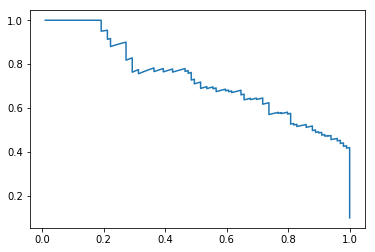

K	Precision	Recall	F1
5	1.0000		0.0505	0.0962	
10	1.0000		0.1010	0.1835	
15	1.0000		0.1515	0.2632	
20	0.9500		0.1919	0.3193	
30	0.9000		0.2727	0.4186	
100	0.6500		0.6566	0.6533	


Precision at cutoff recall


Average precision 0.7346
R-precision 0.65
Discounted Cumulative gain :  85.8744
Normalised Discounted Cumulative gain :  0.9292
***************************************************


Query no: 1
number of docs: 1000
number of related docs: 125
number of related docs retrieved: 125




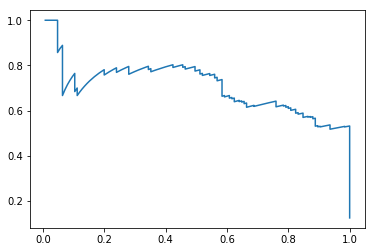

K	Precision	Recall	F1
5	1.0000		0.0400	0.0769	
10	0.8000		0.0640	0.1185	
15	0.7333		0.0880	0.1571	
20	0.7000		0.1120	0.1931	
30	0.7667		0.1840	0.2968	
100	0.7300		0.5840	0.6489	


Precision at cutoff recall


Average precision 0.7097
R-precision 0.6429
Discounted Cumulative gain :  91.1441
Normalised Discounted Cumulative gain :  0.8737
***************************************************


***************************************************
Average values
***************************************************
K	Precision	Recall	F1
5	1.0000		0.0452	0.0865	
10	0.9000		0.0825	0.1510	
15	0.8666		0.1198	0.2102	
20	0.8250		0.1520	0.2562	
30	0.8334		0.2284	0.3577	
100	0.6900		0.6203	0.6511	


Average precision 0.7222
R-precision 0.6464
Discounted Cumulative gain :  88.5093
Normalised Discounted Cumulative gain :  0.9014


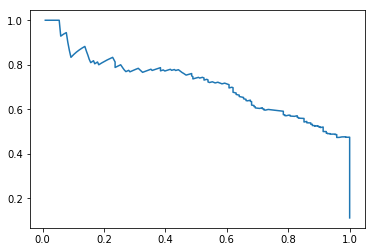

In [16]:
treceval(qrel_file_path, score_file_path,1000, "-q", True)

In [18]:
treceval("qrels.adhoc.51-100.AP89.txt", "tfidf_scores",1000, "-qmlkm",)

***************************************************
Average values
***************************************************
K	Precision	Recall	F1
5	0.3920		0.0552	0.0867	
10	0.3880		0.1153	0.1466	
15	0.3493		0.1436	0.1616	
20	0.3400		0.1745	0.1810	
30	0.3187		0.2164	0.2026	
100	0.2152		0.4020	0.2312	


Average precision 0.2528
R-precision 0.2722
Discounted Cumulative gain :  28.6648
Normalised Discounted Cumulative gain :  0.6319
